<a href="https://colab.research.google.com/github/Akshata1992/Machine_Learning/blob/master/Recom_systems_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#import all necessary libraries

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json

In [65]:
#load the files
movies = pd.read_csv('/content/sample_data/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/sample_data/tmdb_5000_credits.csv')
movies.columns
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

Data Exploration and Cleaning

In [66]:
#get the summary of data
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [67]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [68]:
# changing the genres column from json to string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)

# changing the keywords column from json to string
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)
    
# changing the production_companies column from json to string
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

# changing the cast column from json to string
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)

# changing the crew column from json to string    
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [69]:
movies.iloc[index]

budget                                                                  0
genres                                                    ['Documentary']
homepage                                                              NaN
id                                                                  25975
keywords                ['obsession', 'camcorder', 'crush', 'dream girl']
original_language                                                      en
original_title                                          My Date with Drew
overview                Ever since the second grade when he first saw ...
popularity                                                        1.92988
production_companies     ['rusty bear entertainment', 'lucky crow films']
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2005-08-05
revenue                                                                 0
runtime                               

In [70]:
credits.iloc[index]

movie_id                                                25975
title                                       My Date with Drew
cast        ['Drew Barrymore', 'Brian Herzlinger', 'Corey ...
director                                     Brian Herzlinger
Name: 4802, dtype: object

In [71]:
#Merging the two csv files
movies = movies.merge(credits,left_on='id',right_on='movie_id',how='left')
movies[['id','original_title','genres','cast','vote_average','director','keywords']]

,id,original_title,genres,cast,vote_average,director,keywords
0,19995,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac..."
1,285,Pirates of the Caribbean: At World's End,"['Adventure', 'Fantasy', 'Action']","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east..."
2,206647,Spectre,"['Action', 'Adventure', 'Crime']","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq..."
3,49026,The Dark Knight Rises,"['Action', 'Crime', 'Drama', 'Thriller']","['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's..."
4,49529,John Carter,"['Action', 'Adventure', 'Science Fiction']","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space..."
...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"['Action', 'Crime', 'Thriller']","['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...",6.6,Robert Rodriguez,"['united states–mexico barrier', 'legs', 'arms..."
4799,72766,Newlyweds,"['Comedy', 'Romance']","['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...",5.9,Edward Burns,[]
4800,231617,"Signed, Sealed, Delivered","['Comedy', 'Drama', 'Romance', 'TV Movie']","['Eric Mabius', 'Kristin Booth', 'Crystal Lowe...",7.0,Scott Smith,"['date', 'love at first sight', 'narration', '..."
4801,126186,Shanghai Calling,[],"['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'...",5.7,Daniel Hsia,[]


In [72]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_x                  object
vote_average            float64
vote_count                int64
movie_id                  int64
title_y                  object
cast                     object
director                 object
dtype: object

In [73]:
movies.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802],
           dtype='int64', length=4803)

Working with the Genre column

In [ ]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [80]:
movies.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director,genres_bin
4798,220000,"[Action, Crime, Thriller]",NaN,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,['Columbia Pictures'],"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...",Robert Rodriguez,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4799,9000,"[Comedy, Romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...",Edward Burns,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
4800,0,"[Comedy, Drama, Romance, TVMovie]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"['date', 'love at first sight', 'narration', '...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"['Front Street Pictures', 'Muse Entertainment ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,231617,"Signed, Sealed, Delivered","['Eric Mabius', 'Kristin Booth', 'Crystal Lowe...",Scott Smith,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,126186,Shanghai Calling,"['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'...",Daniel Hsia,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4802,0,[Documentary],NaN,25975,"['obsession', 'camcorder', 'crush', 'dream girl']",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"['rusty bear entertainment', 'lucky crow films']","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,25975,My Date with Drew,"['Drew Barrymore', 'Brian Herzlinger', 'Corey ...",Brian Herzlinger,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


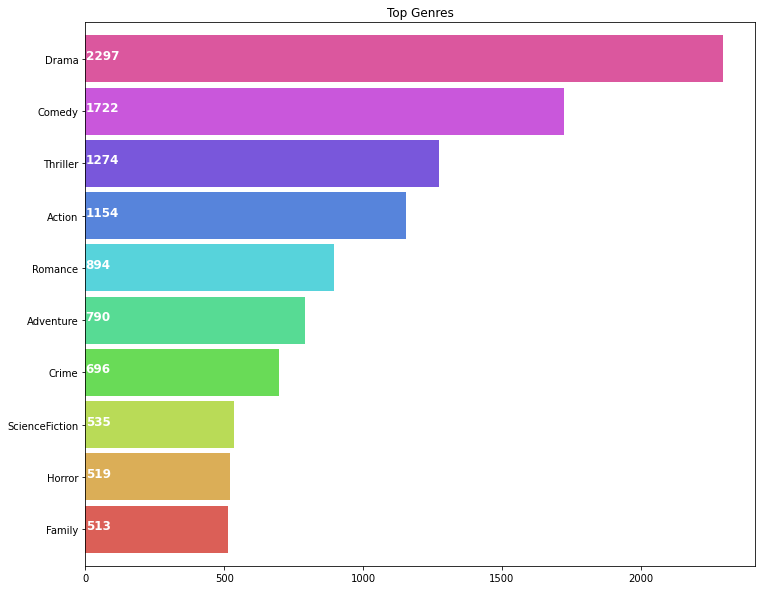

In [75]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
  list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [76]:
#create a genre list with unique genre list
genre_list = []

for index,row in movies.iterrows():
  genres=row['genres']

  for genre in genres:
    if genre not in genre_list:
      genre_list.append(genre)
      
print(genre_list)

['Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie', '']


In [77]:
#convert genres into one hot encoding
def binary(gn_ls):
  bin_list = []

  for g in genre_list:
    if g in gn_ls:
      bin_list.append(1)
    else:
      bin_list.append(0)
  return bin_list

In [78]:
movies['genres_bin'] = movies['genres'].apply(lambda x:binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [86]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

Working with cast column

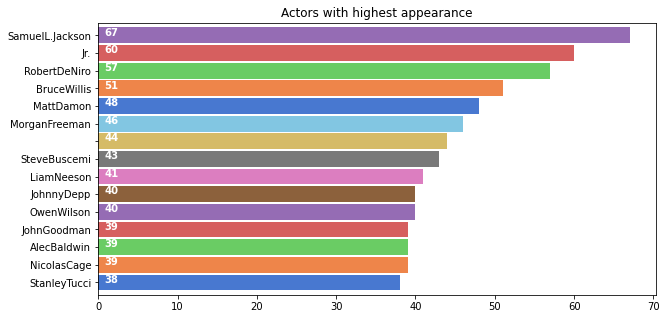

In [87]:
plt.subplots(figsize=(10,5))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

In [90]:
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'cast'] = str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [91]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [92]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [93]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...
2    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3    [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
Name: cast_bin, dtype: object

Working with director column

In [94]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

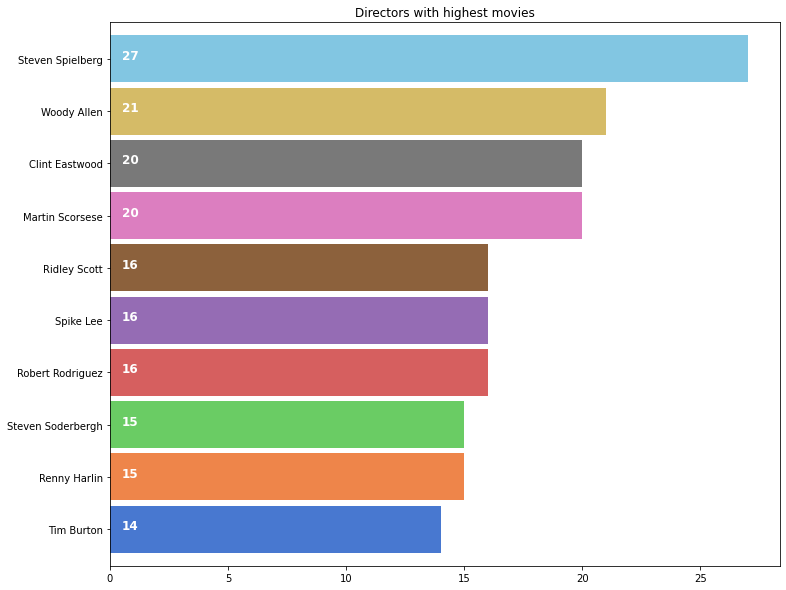

In [95]:
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [96]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [97]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [98]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director,genres_bin,cast_bin,director_bin
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"SamWorthington,SigourneyWeaver,StephenLang,Zoe...",James Cameron,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...",Gore Verbinski,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...",Sam Mendes,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"AnneHathaway,ChristianBale,GaryOldman,MichaelC...",Christopher Nolan,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,260000000,"[Action, Adventure, ScienceFiction]",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"LynnCollins,SamanthaMorton,TaylorKitsch,Willem...",Andrew Stanton,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Working with keywords column

In [104]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


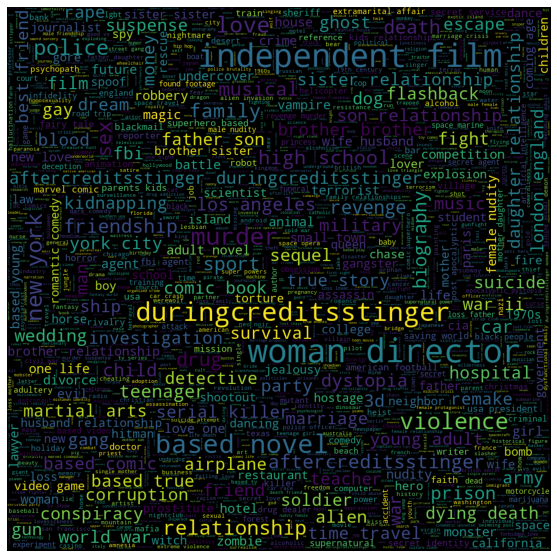

In [105]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [106]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

In [107]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [108]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [109]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies = movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['director']!='']

Similarities between movies

In [110]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [111]:
Similarity(3,160) #checking similarity between any 2 random movies

2.068603127495341

In [112]:
print(movies.iloc[3])
print(movies.iloc[160])

budget                                                          250000000
genres                                   [Action, Crime, Drama, Thriller]
homepage                               http://www.thedarkknightrises.com/
id                                                                  49026
keywords                [batman, burglar, catburglar, catwoman, cover-...
original_language                                                      en
original_title                                      The Dark Knight Rises
overview                Following the death of District Attorney Harve...
popularity                                                        112.313
production_companies    ['Legendary Pictures', 'Warner Bros.', 'DC Ent...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2012-07-16
revenue                                                        1084939099
runtime                               

In [113]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin']]
movies.head()

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,John Carter,"[Action, Adventure, ScienceFiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [114]:
import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [115]:
predict_score('Godfather')

Selected Movie:  The Godfather: Part III


/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)



Recommended Movies: 

The Rainmaker | Genres: 'Drama','Crime','Thriller' | Rating: 6.7
The Godfather | Genres: 'Drama','Crime' | Rating: 8.4
The Cotton Club | Genres: 'Music','Drama','Crime','Romance' | Rating: 6.6
Apocalypse Now | Genres: 'Drama','War' | Rating: 8.0
New York Stories | Genres: 'Comedy','Drama','Romance' | Rating: 6.2
Peggy Sue Got Married | Genres: 'Comedy','Drama','Fantasy','Romance' | Rating: 5.9
End of Watch | Genres: 'Crime','Drama','Thriller' | Rating: 7.2
Only God Forgives | Genres: 'Drama','Thriller','Crime' | Rating: 5.6
Hannibal Rising | Genres: 'Crime','Drama','Thriller' | Rating: 6.0
Savages | Genres: 'Crime','Drama','Thriller' | Rating: 6.2


The predicted rating for The Godfather: Part III is: 6.680000
The actual rating for The Godfather: Part III is 7.100000


In [116]:
predict_score('Donnie Darko')

Selected Movie:  Donnie Darko


/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)



Recommended Movies: 

Southland Tales | Genres: 'Action','Adventure','Comedy','Drama','ScienceFiction','Thriller' | Rating: 5.2
The Box | Genres: 'Thriller','ScienceFiction' | Rating: 5.4
Ghost | Genres: 'Fantasy','Drama','Thriller','Mystery','Romance' | Rating: 6.9
Meet Joe Black | Genres: 'Fantasy','Drama','Mystery' | Rating: 6.9
Lady in the Water | Genres: 'Drama','Thriller','Fantasy','Mystery' | Rating: 5.3
The Deep End of the Ocean | Genres: 'Drama','Mystery' | Rating: 5.9
The Lovely Bones | Genres: 'Fantasy','Drama' | Rating: 6.6
Eyes Wide Shut | Genres: 'Mystery','Drama' | Rating: 7.1
The Legend of Bagger Vance | Genres: 'Fantasy','Drama' | Rating: 6.3
Heavenly Creatures | Genres: 'Drama','Fantasy' | Rating: 7.0


The predicted rating for Donnie Darko is: 6.260000
The actual rating for Donnie Darko is 7.700000


In [117]:
predict_score('Notting Hill')

Selected Movie:  Notting Hill


/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)



Recommended Movies: 

Morning Glory | Genres: 'Comedy','Drama','Romance' | Rating: 6.1
Forrest Gump | Genres: 'Comedy','Drama','Romance' | Rating: 8.2
Cyrus | Genres: 'Comedy','Drama','Romance' | Rating: 6.1
Love Actually | Genres: 'Comedy','Romance','Drama' | Rating: 7.0
Larry Crowne | Genres: 'Comedy','Romance','Drama' | Rating: 5.7
In Good Company | Genres: 'Comedy','Drama','Romance' | Rating: 5.9
Molly | Genres: 'Drama','Comedy','Romance' | Rating: 5.5
When Harry Met Sally... | Genres: 'Comedy','Romance','Drama' | Rating: 7.3
Youth in Revolt | Genres: 'Drama','Comedy','Romance' | Rating: 5.9
And So It Goes | Genres: 'Comedy','Drama','Romance' | Rating: 5.7


The predicted rating for Notting Hill is: 6.340000
The actual rating for Notting Hill is 7.000000


In [118]:
predict_score('Despicable Me')

Selected Movie:  Despicable Me 2


/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)



Recommended Movies: 

Despicable Me | Genres: 'Animation','Family' | Rating: 7.1
Monsters, Inc. | Genres: 'Animation','Comedy','Family' | Rating: 7.5
Cloudy with a Chance of Meatballs 2 | Genres: 'Animation','Family','Comedy' | Rating: 6.4
Over the Hedge | Genres: 'Comedy','Animation','Family' | Rating: 6.3
Hotel Transylvania 2 | Genres: 'Animation','Comedy','Family' | Rating: 6.7
Looney Tunes: Back in Action | Genres: 'Animation','Comedy','Family' | Rating: 5.6
The Simpsons Movie | Genres: 'Animation','Comedy','Family' | Rating: 6.9
Barnyard | Genres: 'Animation','Comedy','Family' | Rating: 5.3
Chicken Little | Genres: 'Animation','Family','Comedy' | Rating: 5.6
Hop | Genres: 'Animation','Comedy','Family' | Rating: 5.5


The predicted rating for Despicable Me 2 is: 6.290000
The actual rating for Despicable Me 2 is 7.000000
